### Generate one sample path of $S(t)$ and computes the time to failure (TTF)

TTF was: 4.0


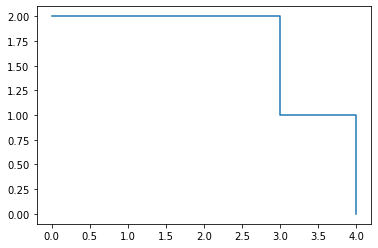

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# start with 2 functioning components at time 0
clock = 0
S = 2

# fix random number seed
#np.random.seed(1)

# initialize the time of events
NextRepair = float('inf')
NextFailure = np.ceil(6*np.random.random())
# lists to keep the event times and the states
EventTimes = [0]
States = [2]

while S > 0:
    # advance the time
    clock = min(NextRepair, NextFailure)
    if NextRepair < NextFailure:
        # next event is completion of a repair
        S = S + 1
        NextRepair = float('inf')
    else:
        # next event is a failure
        S = S - 1
        if S == 1:
            NextRepair = clock + 2.5
            NextFailure = clock + np.ceil(6*np.random.random())
    
    # save the time and state
    EventTimes.append(clock)
    States.append(S)

# plot the sample path
print ('TTF was:', clock)
plt.plot(EventTimes, States, drawstyle = 'steps-post')
plt.show()

### Run multiple replications and estimate the expected value of time to failure and average # of fucntioning components till failure.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of replications
N = 1000
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []

# fix random number seed
np.random.seed(1)

for rep in range (0,N):
    # start with 2 functioning components at time 0
    clock = 0
    S = 2
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    EventTimes = [0]
    States = [2]
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    Slast = 2

    while S > 0:
        # advance the time
        clock = min(NextRepair, NextFailure)

        if NextRepair < NextFailure:
            # next event is completion of a repair
            S = S + 1
            NextRepair = float('inf')
        elif NextRepair > NextFailure:
            # next event is a failure
            S = S - 1
            if S == 1:
                NextRepair = clock + 2.5
                NextFailure = clock + np.ceil(6*np.random.random())
        else:
            NextRepair = clock + 2.5
            NextFailure = clock + np.ceil(6*np.random.random())
        # Update the area under the sample path and the
        # time and state of the last event
        Area = Area + (clock - Tlast)* Slast
        Tlast = clock
        Slast = S

    # save the TTF and average # of func. components
    TTF_list.append(clock)
    Ave_list.append(Area/clock)

print('Estimated expected TTF:', np.mean(TTF_list))
print('Estimated expected ave. # of func. comp. till failure:', np.mean(Ave_list))

print ('95% CI for TTF:', np.mean(TTF_list), "+/-",
       1.96*np.std(TTF_list, ddof = 1)/np.sqrt(N))
print ('95% CI for ave. # of func. comp.:', np.mean(Ave_list), "+/-",
       1.96*np.std(Ave_list, ddof = 1)/np.sqrt(N))

Estimated expected TTF: 13.927
Estimated expected ave. # of func. comp. till failure: 1.568840332841451
95% CI for TTF: 13.927 +/- 0.7274410509424089
95% CI for ave. # of func. comp.: 1.568840332841451 +/- 0.008120648766690015


### Functional version

In [3]:
import numpy as np

def Failure ():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair

    S = S - 1
    if S == 1:
        NextRepair = clock + 2.5
        NextFailure = clock + np.ceil(6*np.random.random())
    # Update the area under the sample path and the
    # time and state at the last event
    Area = Area + (clock - Tlast)* Slast
    Tlast = clock
    Slast = S

def Repair():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair

    S = S + 1
    NextRepair = float('inf')
    Area = Area + Slast * (clock - Tlast)
    Slast = S
    Tlast = clock

def Timer():
    global clock
    global NextRepair
    global NextFailure

    if NextFailure < NextRepair:
        result = "Failure"
        clock = NextFailure

    else:
        result = "Repair"
        clock = NextRepair
    return result 


# Set number of replications
N = 100
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []
# fix random number seed
np.random.seed(1)

# Replication loop
for reps in range(0,N):
    # start with 2 functioning components at time 0
    clock = 0
    S = 2
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    Slast = 2

    while S > 0: # While system is functional
        NextEvent = Timer()

        if NextEvent == "Repair":
            Repair()
        else:
            Failure()

    # add samples to the lists
    TTF_list.append(clock)
    Ave_list.append(Area/clock)

# print sample averages
print('Estimated expected TTF:', np.mean(TTF_list))
print('Estimated expected ave. # of func. comp. till failure:', np.mean(Ave_list))

Estimated expected TTF: 14.63
Estimated expected ave. # of func. comp. till failure: 1.5628147211463042


In [4]:
# plt.hist(np.array(samplemean(1000)), label = 'size=1000')
# plt.hist(np.array(samplemean(10000)), label = 'size=10000')   
plt.show
# def plot_samplemeans(lst):
#     max_length = max(lst)
#     max_sample_mean = samplemean(max_length)
#     bins = [i/500 for i in range(int(min(max_sample_mean) * 500), int(max(max_sample_mean) * 500))]
#     sample_means = []
#     labels = []
#     for length in lst:
#         sample_means.append(samplemean(length))
#         labels.append(f"size: {length}")
#     plt.hist(sample_means, bins, alpha = 0.5, label = labels)
#     plt.legend(loc='upper right')
#     plt.show()
        
# plot_samplemeans([10, 100, 500])

# print('Estimated expected value for size', n, ':', np.mean(y))
# print ('95% CI for expected value for size', n, ':', np.mean(y), "+/-", 1.96*np.std(y, ddof = 1)/np.sqrt(n))



<function matplotlib.pyplot.show(*args, **kw)>

In [8]:
import numpy as np

def Failure ():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair
    global Available_Area

    S = S - 1
    if S == 0:
        NextFailure = float('inf')
    elif S == 1:
        NextRepair = clock + 2.5
        NextFailure = clock + np.ceil(6*np.random.random())
    # Update the area under the sample path and the
    # time and state at the last event
    Area = Area + (clock - Tlast)* Slast
    Available_Area += (Slast > 0) * (clock - Tlast)
    Tlast = clock
    Slast = S

def Repair():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair
    global Available_Area

    S = S + 1
    if S == 2:
        NextRepair = float('inf')
    else:
        NextRepair = clock + 2.5
    Area = Area + Slast * (clock - Tlast)
    Available_Area += (Slast > 0) * (clock - Tlast)
    Slast = S
    Tlast = clock

def EndSimulation():
    global S
    global Slast
    global Tlast
    global Area
    global Available_Area
    Available_Area += (Slast > 0) * (clock - Tlast)
    Area = Area + Slast * (clock - Tlast)
    Slast = S
    Tlast = clock

def Timer():
    global clock
    global NextRepair
    global NextFailure
    global NextEndSimulation

    if NextEndSimulation < min(NextRepair, NextFailure):
        result = 'EndSimulation'
        clock = NextEndSimulation
    elif NextFailure < NextRepair:
        result = "Failure"
        clock = NextFailure
    else:
        result = "Repair"
        clock = NextRepair
    return result

def simulation(T):
    global clock
    global S
    global Slast
    global Tlast
    global Area
    global Available_Area
    global NextFailure
    global NextRepair
    global NextEndSimulation
    # Set number of replications
    N = 1
    # Define lists to keep samples of the outputs across replications
    Ave_list = []
    # fix random number seed
    np.random.seed(1)

    # Replication loop
    for reps in range(0,N):
        # start with 2 functioning components at time 0
        clock = 0
        S = 2
        # initialize the time of events
        NextRepair = float('inf')
        NextFailure = np.ceil(6*np.random.random())
        NextEndSimulation = T
        # Define variables to keep the area under the sample path
        # and the time and state of the last event
        Area = 0.0
        Available_Area = 0.0
        Tlast = 0
        Slast = 2

        while True: # While system is functional
            NextEvent = Timer()

            if NextEvent == 'EndSimulation':
                EndSimulation()
                break
            if NextEvent == "Repair":
                Repair()
            else:
                Failure()

        # add samples to the lists
        Ave_list.append(Area/clock)

    # print sample averages
    print('Estimated average number of functional components until time T = ' + str(T) + ' :', np.mean(Ave_list))
    print('Estimated average system availability until T = ' + str(T) + ' :', Available_Area/T)

for T in [1000, 3000]:
    simulation(T)
# ('Estimated average number of functional components until time T = 1000 :', 1.9910000000000001)
# ('Estimated average system availability until T = 1000 :', 0.99850000000000005)
# ('Estimated average number of functional components until time T = 3000 :', 1.9970000000000001)
# ('Estimated average system availability until T = 3000 :', 0.99950000000000006)


Estimated average number of functional components until time T = 1000 : 1.991
Estimated average system availability until T = 1000 : 0.9985
Estimated average number of functional components until time T = 3000 : 1.997
Estimated average system availability until T = 3000 : 0.9995


In [ ]:
import numpy as np

def Failure ():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair
    global Available_Area

    S = S - 1
    # One component failed
    if S == 1:
        NextRepair = clock + 2.5
    # If we have at lest one component is working
    if S > 0:
        NextFailure = clock + np.ceil(6 * np.random.random())
    # No component is working
    else:
        NextFailure = float('inf')
    # Update the area and available area under the sample path and the
    # time and state at the last event
    Area = Area + (clock - Tlast)* Slast
    Available_Area += (Slast > 0) * (clock - Tlast)
    Tlast = clock
    Slast = S

def Repair():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair
    global Available_Area

    S = S + 1
    # All components are in good status
    if S == 2:
        NextRepair = float('inf')
    # Need to repair another component
    else S == 1:
        NextRepair = clock + 2.5
    # One component back to work
    if S == 1:
        NextFailure = clock + np.ceil(6 * np.random.random())
    # Update the area and available area under the sample path and the
    # time and state at the last event
    Area = Area + Slast * (clock - Tlast)
    Available_Area += (Slast > 0) * (clock - Tlast)
    Slast = S
    Tlast = clock

def EndSimulation():
    global S
    global Slast
    global Tlast
    global Area
    global Available_Area
    # Update the area and available area under the sample path and the
    # time and state at the last event
    Available_Area += (Slast > 0) * (clock - Tlast)
    Area = Area + Slast * (clock - Tlast)
    Slast = S
    Tlast = clock

def Timer():
    global clock
    global NextRepair
    global NextFailure
    global NextEndSimulation

    if NextEndSimulation < min(NextRepair, NextFailure):
        result = 'EndSimulation'
        clock = NextEndSimulation
    elif NextFailure < NextRepair:
        result = "Failure"
        clock = NextFailure
    else:
        result = "Repair"
        clock = NextRepair
    return result

def simulation(T):
    global clock
    global S
    global Slast
    global Tlast
    global Area
    global Available_Area
    global NextFailure
    global NextRepair
    global NextEndSimulation
    # Set number of replications
    N = 1
    # Define lists to keep samples of the outputs across replications
    Ave_list = []
    # fix random number seed
    np.random.seed(1)
    # Replication loop
    for reps in range(0,N):
        # start with 2 functioning components at time 0
        clock = 0
        S = 2
        # initialize the time of events
        NextRepair = float('inf')
        NextFailure = np.ceil(6*np.random.random())
        NextEndSimulation = T
        # Define variables to keep the area under the sample path
        # and the time and state of the last event
        Area = 0.0
        Available_Area = 0.0
        Tlast = 0
        Slast = 2

        while True: # While system is functional
            NextEvent = Timer()

            if NextEvent == "Repair":
                Repair()
            elif NextEvent == 'Failure':
                Failure()
            else:
                EndSimulation()
                break

        # add samples to the lists
        Ave_list.append(Area/clock)

    # print sample averages
    print('Estimated average number of functional components until time T = ' + str(T) + ' :', np.mean(Ave_list))
    print('Estimated average system availability until T = ' + str(T) + ' :', Available_Area/T)

for T in [1000, 3000]:
    simulation(T)
# Estimated average number of functional components until time T = 1000 : 1.2645
# Estimated average system availability until T = 1000 : 0.9035
# Estimated average number of functional components until time T = 3000 : 1.262
# Estimated average system availability until T = 3000 : 0.916



In [ ]:
import numpy as np

# fix random number seed
np.random.seed(1)

def Failure ():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair

    S = S - 1
    # One component failed
    if S == N-1:
        NextRepair = clock + 2.5
    # If we have at lest one component is working
    if S > 0:
        NextFailure = clock + np.ceil(6 * np.random.random())
    # No component is working
    else:
        NextFailure = float('inf')
    # Update the area under the sample path and the
    # time and state at the last event
    Area = Area + (clock - Tlast)* Slast
    Tlast = clock
    Slast = S

def Repair():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair

    S = S + 1
    if S == N:
        NextRepair = float('inf')
    else:
        NextRepair = clock + 2.5
    # One component back to work
    if NextFailure == float('inf'):
        # should not pass to here, Since no need to repair if system failed
        NextFailure = clock + np.ceil(6 * np.random.random())
    Area = Area + Slast * (clock - Tlast)
    Slast = S
    Tlast = clock

def Timer():
    global clock
    global NextRepair
    global NextFailure

    if NextFailure < NextRepair:
        result = "Failure"
        clock = NextFailure

    else:
        result = "Repair"
        clock = NextRepair
    return result

def TTF_simulation(N):
    global clock
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair
    # Define lists to keep samples of the outputs across replications
    TTF_list = []
    for reps in range(1000):

        clock = 0
        S = N
        # initialize the time of events
        NextRepair = float('inf')
        NextFailure = np.ceil(6 * np.random.random())
        # Define variables to keep the area under the sample path
        # and the time and state of the last event
        Area = 0.0
        Tlast = 0
        Slast = N

        while S > 0:  # While system is functional
            NextEvent = Timer()

            if NextEvent == "Repair":
                Repair()
            else:
                Failure()
        # add samples to the lists
        TTF_list.append(clock)
    # print sample averages
    print('Number of components:', N)
    print ('95% CI for TTF:', np.mean(TTF_list), "+/-",
           1.96 * np.std(TTF_list, ddof=1) / np.sqrt(len(TTF_list)))

for N in [2,3,4]:
    TTF_simulation(N)

# Number of components: 2
# 95% CI for TTF: 13.927 +/- 0.7274410509424089
# Number of components: 3
# 95% CI for TTF: 109.568 +/- 7.032541548905253
# Number of components: 4
# 95% CI for TTF: 1016.817 +/- 62.28534615700354
